In [2]:
import pandas as pd

# This is your file's unique ID from the Google Drive link
file_id = '1oLnHBCvL6zLrB1jCm2IcPeqhUPEJ5T6K'

# Construct a direct download URL
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Read the CSV directly from Google Drive
df = pd.read_csv(url)

# Preview the first 5 rows
df.head()


,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,9/27/2023,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,All Sexes,All Ages,1146774.0,12303399.0,1162844.0,569264.0,22229.0,1760095.0,NaN
1,9/27/2023,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,All Sexes,Under 1 year,519.0,73213.0,1056.0,95.0,64.0,1541.0,NaN
2,9/27/2023,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,All Sexes,0-17 years,1696.0,130970.0,2961.0,424.0,509.0,4716.0,NaN
3,9/27/2023,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,All Sexes,1-4 years,285.0,14299.0,692.0,66.0,177.0,1079.0,NaN
4,9/27/2023,1/1/2020,9/23/2023,By Total,NaN,NaN,United States,All Sexes,5-14 years,509.0,22008.0,818.0,143.0,219.0,1390.0,NaN


In [3]:
# Basic info
df.info()

# First few rows
df.head()

# Column names
print(df.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137700 entries, 0 to 137699
Data columns (total 16 columns):
Data As Of                                  137700 non-null object
Start Date                                  137700 non-null object
End Date                                    137700 non-null object
Group                                       137700 non-null object
Year                                        134946 non-null float64
Month                                       123930 non-null float64
State                                       137700 non-null object
Sex                                         137700 non-null object
Age Group                                   137700 non-null object
COVID-19 Deaths                             98270 non-null float64
Total Deaths                                118191 non-null float64
Pneumonia Deaths                            92836 non-null float64
Pneumonia and COVID-19 Deaths               100816 non-null float64
Influenza Deat

In [4]:
# Convert date columns to datetime
df['Data As Of'] = pd.to_datetime(df['Data As Of'])
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

# Optional: rename columns to remove long names (cleaner to work with)
df = df.rename(columns={
    'COVID-19 Deaths': 'COVID_Deaths',
    'Pneumonia Deaths': 'Pneumonia_Deaths',
    'Pneumonia and COVID-19 Deaths': 'Pneumonia_COVID_Deaths',
    'Influenza Deaths': 'Flu_Deaths',
    'Pneumonia, Influenza, or COVID-19 Deaths': 'PIC_Deaths'
})

# Convert Year and Month to int (if not null)
df['Year'] = df['Year'].fillna(0).astype(int)
df['Month'] = df['Month'].fillna(0).astype(int)


In [5]:
df.isnull().sum()


Data As Of                    0
Start Date                    0
End Date                      0
Group                         0
Year                          0
Month                         0
State                         0
Sex                           0
Age Group                     0
COVID_Deaths              39430
Total Deaths              19509
Pneumonia_Deaths          44864
Pneumonia_COVID_Deaths    36884
Flu_Deaths                26688
PIC_Deaths                44233
Footnote                  39804
dtype: int64

In [6]:
df_clean = df.dropna(subset=['COVID_Deaths'])


In [7]:
# Preview cleaned data
df_clean.info()

# Check unique values
print("States:", df_clean['State'].nunique())
print("Years:", df_clean['Year'].unique())
print("Age Groups:", df_clean['Age Group'].unique())
print("Sex values:", df_clean['Sex'].unique())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 98270 entries, 0 to 137696
Data columns (total 16 columns):
Data As Of                98270 non-null datetime64[ns]
Start Date                98270 non-null datetime64[ns]
End Date                  98270 non-null datetime64[ns]
Group                     98270 non-null object
Year                      98270 non-null int64
Month                     98270 non-null int64
State                     98270 non-null object
Sex                       98270 non-null object
Age Group                 98270 non-null object
COVID_Deaths              98270 non-null float64
Total Deaths              80293 non-null float64
Pneumonia_Deaths          80202 non-null float64
Pneumonia_COVID_Deaths    86330 non-null float64
Flu_Deaths                77650 non-null float64
PIC_Deaths                81113 non-null float64
Footnote                  58466 non-null object
dtypes: datetime64[ns](3), float64(6), int64(2), object(5)
memory usage: 12.7+ MB
States: 54
Y

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by year and month to get monthly totals
monthly_deaths = df_clean[df_clean['Age Group'] == 'All Ages'].groupby(['Year', 'Month'])['COVID_Deaths'].sum().reset_index()

# Create a proper date column for plotting
monthly_deaths['Date'] = pd.to_datetime(monthly_deaths['Year'].astype(str) + '-' + monthly_deaths['Month'].astype(str) + '-01')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_deaths, x='Date', y='COVID_Deaths', marker='o')
plt.title('COVID-19 Deaths Over Time (All Ages, All States)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()


ValueError: month must be in 1..12

In [9]:
# Filter out placeholder 0s in year/month
monthly_deaths = monthly_deaths[(monthly_deaths['Year'] > 0) & (monthly_deaths['Month'] > 0)]

# Create the date column now that we have valid values
monthly_deaths['Date'] = pd.to_datetime(monthly_deaths['Year'].astype(str) + '-' + monthly_deaths['Month'].astype(str) + '-01')


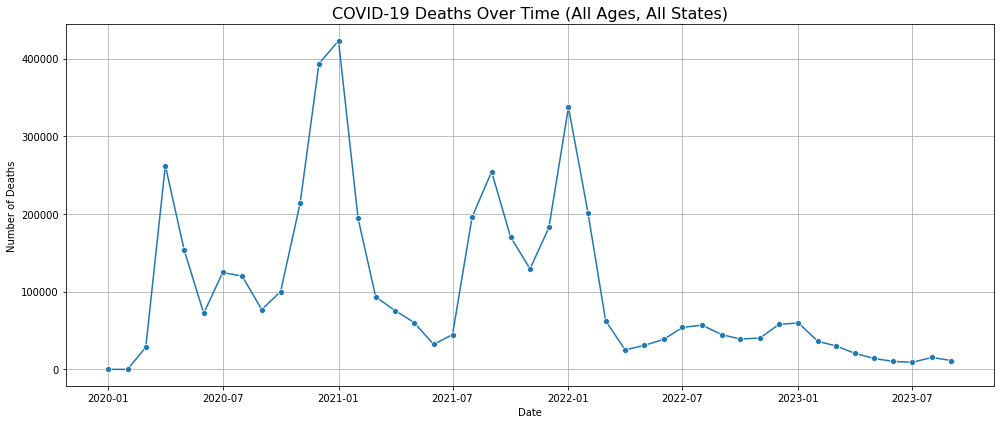

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_deaths, x='Date', y='COVID_Deaths', marker='o')
plt.title('COVID-19 Deaths Over Time (All Ages, All States)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()


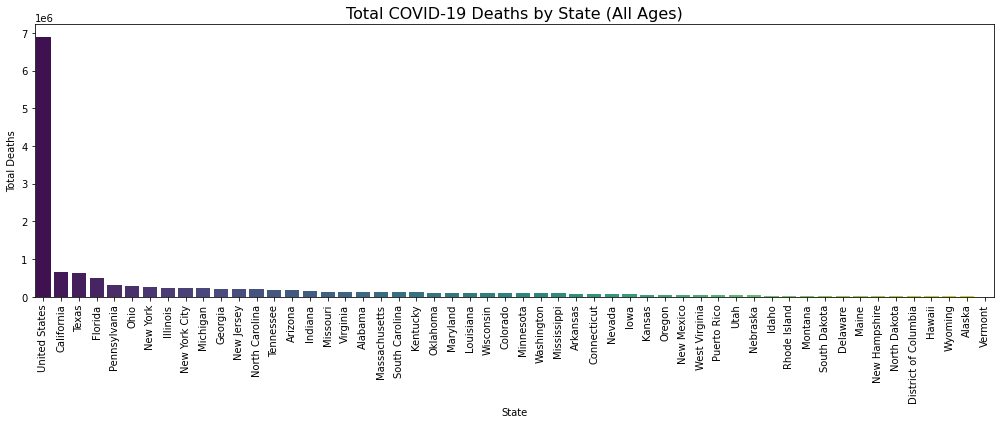

In [11]:
# Total COVID deaths per state
state_totals = df_clean[df_clean['Age Group'] == 'All Ages'].groupby('State')['COVID_Deaths'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(x=state_totals.index, y=state_totals.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Total COVID-19 Deaths by State (All Ages)', fontsize=16)
plt.ylabel('Total Deaths')
plt.xlabel('State')
plt.tight_layout()
plt.show()


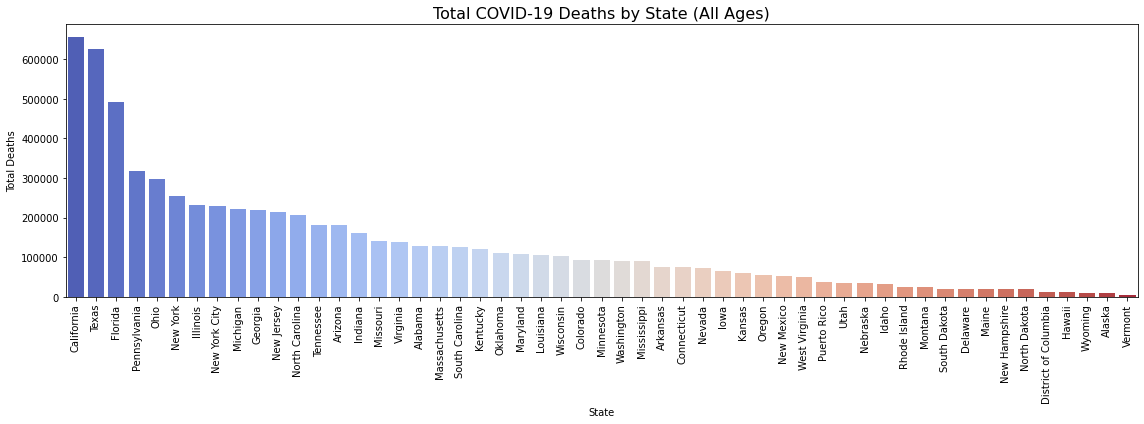

In [12]:
# Filter for "All Ages" and exclude 'United States' as a state
df_states = df_clean[(df_clean['Age Group'] == 'All Ages') & (df_clean['State'] != 'United States')]

# Group by state and sum COVID deaths
state_totals = df_states.groupby('State')['COVID_Deaths'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(16, 6))
sns.barplot(x=state_totals.index, y=state_totals.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Total COVID-19 Deaths by State (All Ages)', fontsize=16)
plt.ylabel('Total Deaths')
plt.xlabel('State')
plt.tight_layout()
plt.show()


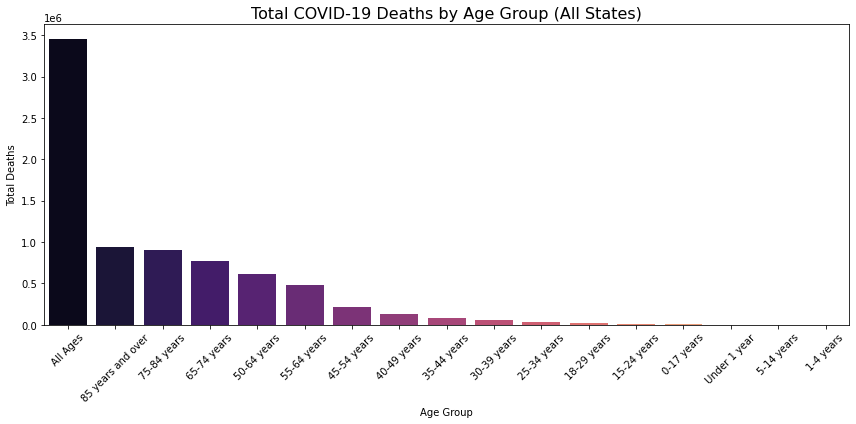

In [13]:
# Filter to remove 'United States' again and only keep 'All Sexes'
df_age = df_clean[(df_clean['State'] != 'United States') & (df_clean['Sex'] == 'All Sexes')]

# Group by age group and sum COVID deaths
age_totals = df_age.groupby('Age Group')['COVID_Deaths'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=age_totals.index, y=age_totals.values, palette='magma')
plt.xticks(rotation=45)
plt.title('Total COVID-19 Deaths by Age Group (All States)', fontsize=16)
plt.ylabel('Total Deaths')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()


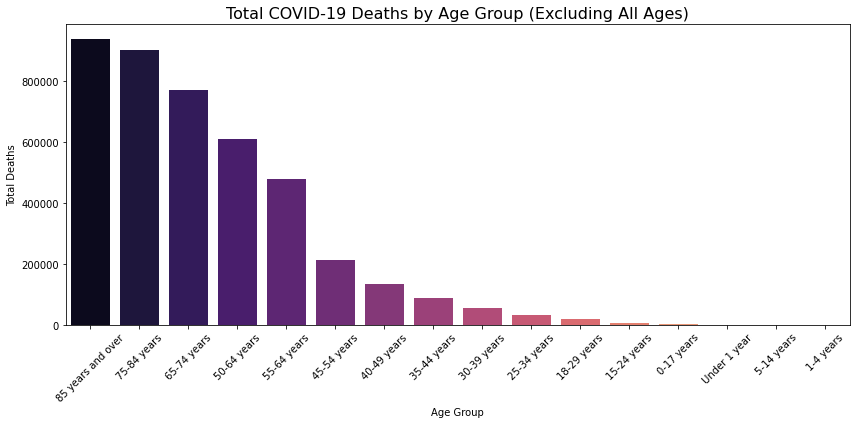

In [14]:
# Filter out 'United States', keep 'All Sexes', and exclude 'All Ages'
df_age = df_clean[
    (df_clean['State'] != 'United States') &
    (df_clean['Sex'] == 'All Sexes') &
    (df_clean['Age Group'] != 'All Ages')
]

# Group and sort
age_totals = df_age.groupby('Age Group')['COVID_Deaths'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=age_totals.index, y=age_totals.values, palette='magma')
plt.xticks(rotation=45)
plt.title('Total COVID-19 Deaths by Age Group (Excluding All Ages)', fontsize=16)
plt.ylabel('Total Deaths')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()


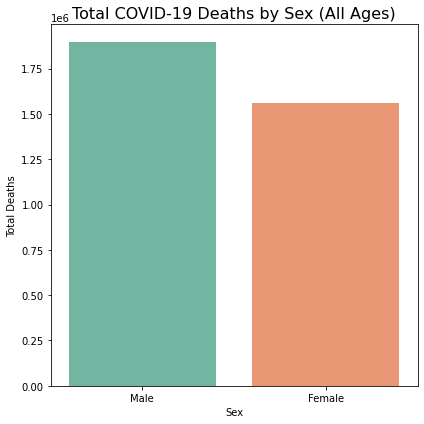

In [15]:
# Filter: All ages, exclude 'United States', only Male/Female
df_sex = df_clean[
    (df_clean['State'] != 'United States') &
    (df_clean['Age Group'] == 'All Ages') &
    (df_clean['Sex'].isin(['Male', 'Female']))
]

# Group and sum
sex_totals = df_sex.groupby('Sex')['COVID_Deaths'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(6, 6))
sns.barplot(x=sex_totals.index, y=sex_totals.values, palette='Set2')
plt.title('Total COVID-19 Deaths by Sex (All Ages)', fontsize=16)
plt.ylabel('Total Deaths')
plt.xlabel('Sex')
plt.tight_layout()
plt.show()


In [17]:
# Filter for all states combined and all ages, sexes
df_heatmap = df_clean[
    (df_clean['State'] == 'United States') &
    (df_clean['Age Group'] == 'All Ages') &
    (df_clean['Sex'] == 'All Sexes')
]

# Group by year & month and sum deaths
monthly_deaths = df_heatmap.groupby(['Year', 'Month'])['COVID_Deaths'].sum().reset_index()

# Create a proper date column for sorting
monthly_deaths['Date'] = pd.to_datetime(monthly_deaths['Year'].astype(int).astype(str) + '-' + monthly_deaths['Month'].astype(int).astype(str) + '-01')

# Pivot to year vs month format
heatmap_data = monthly_deaths.pivot_table(index='Year', columns='Month', values='COVID_Deaths', fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="Reds", linewidths=0.5, linecolor='gray', annot=True, fmt=".0f")
plt.title('Monthly COVID-19 Deaths in the U.S. by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


ValueError: month must be in 1..12

In [18]:
# Keep only rows where month is between 1 and 12
monthly_deaths = monthly_deaths[
    (monthly_deaths['Month'].astype(float).between(1, 12, inclusive=True)) &
    (monthly_deaths['Year'] != 0)
]


In [19]:
monthly_deaths['Date'] = pd.to_datetime(
    monthly_deaths['Year'].astype(int).astype(str) + '-' + 
    monthly_deaths['Month'].astype(int).astype(str).str.zfill(2) + '-01'
)


In [21]:
print(monthly_deaths['Month'].unique())


[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [22]:
# Remove rows with invalid months or years
monthly_deaths = monthly_deaths[(monthly_deaths['Month'] != 0) & (monthly_deaths['Year'] != 0)]

# Now create the Date column
monthly_deaths['Date'] = pd.to_datetime(
    monthly_deaths['Year'].astype(str) + '-' +
    monthly_deaths['Month'].astype(str).str.zfill(2) + '-01'
)


In [24]:
# Check month values
print("Unique months before filtering:", monthly_deaths['Month'].unique())

# Filter out invalid months or years
monthly_deaths = monthly_deaths[
    monthly_deaths['Month'].between(1, 12) &
    monthly_deaths['Year'].between(2000, 2100)  # Just in case
]

# Create the Date column (pad months to 2 digits)
monthly_deaths['Date'] = pd.to_datetime(
    monthly_deaths['Year'].astype(str) + '-' +
    monthly_deaths['Month'].astype(str).str.zfill(2) + '-01'
)

# Confirm
print("✅ Date column created. Sample:")
print(monthly_deaths[['Year', 'Month', 'Date']].head())


Unique months before filtering: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
✅ Date column created. Sample:
   Year  Month       Date
2  2020      1 2020-01-01
3  2020      2 2020-02-01
4  2020      3 2020-03-01
5  2020      4 2020-04-01
6  2020      5 2020-05-01


In [25]:
import matplotlib.pyplot as plt

# Group by Date and sum Total Deaths
monthly_trend = df.groupby('Date')['Total Deaths'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend['Date'], monthly_trend['Total Deaths'], marker='o', linestyle='-')
plt.title('Total Deaths Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'Date'

In [26]:
# Use the 'monthly_deaths' DataFrame we already worked with
monthly_trend = monthly_deaths.groupby('Date')['Total Deaths'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend['Date'], monthly_trend['Total Deaths'], marker='o', linestyle='-')
plt.title('Total Deaths Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'Column not found: Total Deaths'

In [27]:
print(monthly_deaths.columns)


Index(['Year', 'Month', 'COVID_Deaths', 'Date'], dtype='object')


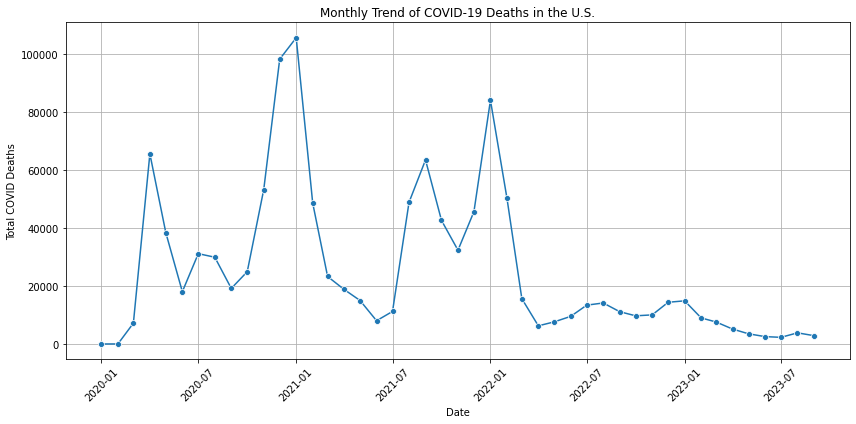

In [28]:
# Group by Date and sum COVID_Deaths
monthly_trend = monthly_deaths.groupby('Date')['COVID_Deaths'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='Date', y='COVID_Deaths', marker='o')
plt.title('Monthly Trend of COVID-19 Deaths in the U.S.')
plt.xlabel('Date')
plt.ylabel('Total COVID Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [29]:
# Overall summary for COVID deaths
overall_stats = df['COVID_Deaths'].describe()
print("Overall Descriptive Statistics:\n", overall_stats)


Overall Descriptive Statistics:
 count    9.827000e+04
mean     3.135865e+02
std      5.992341e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+01
max      1.146774e+06
Name: COVID_Deaths, dtype: float64


In [30]:
# Group by state and describe COVID deaths
state_stats = df.groupby('State')['COVID_Deaths'].describe()
print("Descriptive Stats by State:\n", state_stats)


Descriptive Stats by State:
                        count         mean           std  min   25%    50%  \
State                                                                       
Alabama               1846.0   158.680390    797.771936  0.0   0.0   14.0   
Alaska                1711.0    10.797195     59.166870  0.0   0.0    0.0   
Arizona               1843.0   223.565925   1130.274759  0.0   0.0   21.0   
Arkansas              1792.0    94.131696    472.831798  0.0   0.0    0.0   
California            1951.0   765.421322   3962.960568  0.0  12.0   64.0   
Colorado              1778.0   114.587177    576.919918  0.0   0.0   12.0   
Connecticut           1779.0    90.299044    490.841960  0.0   0.0    0.0   
Delaware              1745.0    24.546132    129.880747  0.0   0.0    0.0   
District of Columbia  1635.0    17.551682     88.569512  0.0   0.0    0.0   
Florida               1902.0   577.697687   2991.983482  0.0   0.0   46.5   
Georgia               1829.0   273.461454   135

In [31]:
# Group by age group
age_stats = df.groupby('Age Group')['COVID_Deaths'].describe()
print("Descriptive Stats by Age Group:\n", age_stats)


Descriptive Stats by Age Group:
                     count         mean           std  min   25%    50%    75%  \
Age Group                                                                       
0-17 years         5781.0     2.699879     32.748703  0.0   0.0    0.0    0.0   
1-4 years          7254.0     0.272677      4.987267  0.0   0.0    0.0    0.0   
15-24 years        5607.0     5.445871     61.080200  0.0   0.0    0.0    0.0   
18-29 years        4878.0    15.652727    153.239547  0.0   0.0    0.0    0.0   
25-34 years        4605.0    30.250163    279.316274  0.0   0.0    0.0   11.0   
30-39 years        4430.0    51.464108    458.408133  0.0   0.0    0.0   18.0   
35-44 years        4387.0    79.860269    697.080253  0.0   0.0    0.0   28.0   
40-49 years        4538.0   119.979286   1050.736085  0.0   0.0   13.0   40.0   
45-54 years        4797.0   176.587450   1571.677330  0.0   0.0   18.0   57.0   
5-14 years         6851.0     0.570282      8.967931  0.0   0.0    0.0    0.

In [32]:
# Group by sex
sex_stats = df.groupby('Sex')['COVID_Deaths'].describe()
print("Descriptive Stats by Sex:\n", sex_stats)


Descriptive Stats by Sex:
              count        mean          std  min  25%   50%    75%        max
Sex                                                                          
All Sexes  32965.0  468.063704  8426.474061  0.0  0.0  13.0  78.00  1146774.0
Female     32639.0  208.857042  3825.406799  0.0  0.0   0.0  35.00   517046.0
Male       32666.0  262.338364  4659.500438  0.0  0.0   0.0  44.75   629728.0


In [33]:
# Overall summary
overall_stats = df['COVID_Deaths'].describe()
print(" Overall Descriptive Statistics:\n", overall_stats)

# By State
state_stats = df.groupby('State')['COVID_Deaths'].describe()
print("\n Descriptive Statistics by State:\n", state_stats)

# By Age Group
age_stats = df.groupby('Age Group')['COVID_Deaths'].describe()
print("\n Descriptive Statistics by Age Group:\n", age_stats)

# By Sex
sex_stats = df.groupby('Sex')['COVID_Deaths'].describe()
print("\n Descriptive Statistics by Sex:\n", sex_stats)


📌 Overall Descriptive Statistics:
 count    9.827000e+04
mean     3.135865e+02
std      5.992341e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+01
max      1.146774e+06
Name: COVID_Deaths, dtype: float64

📌 Descriptive Statistics by State:
                        count         mean           std  min   25%    50%  \
State                                                                       
Alabama               1846.0   158.680390    797.771936  0.0   0.0   14.0   
Alaska                1711.0    10.797195     59.166870  0.0   0.0    0.0   
Arizona               1843.0   223.565925   1130.274759  0.0   0.0   21.0   
Arkansas              1792.0    94.131696    472.831798  0.0   0.0    0.0   
California            1951.0   765.421322   3962.960568  0.0  12.0   64.0   
Colorado              1778.0   114.587177    576.919918  0.0   0.0   12.0   
Connecticut           1779.0    90.299044    490.841960  0.0   0.0    0.0   
Delaware              17

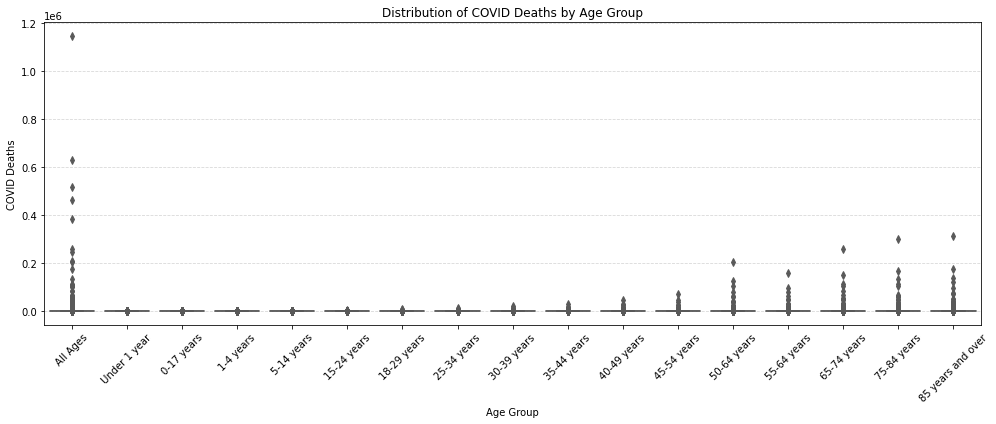

In [34]:
import seaborn as sns

# Boxplot of COVID deaths by Age Group
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='Age Group', y='COVID_Deaths', palette='Set2')
plt.title('Distribution of COVID Deaths by Age Group')
plt.ylabel('COVID Deaths')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


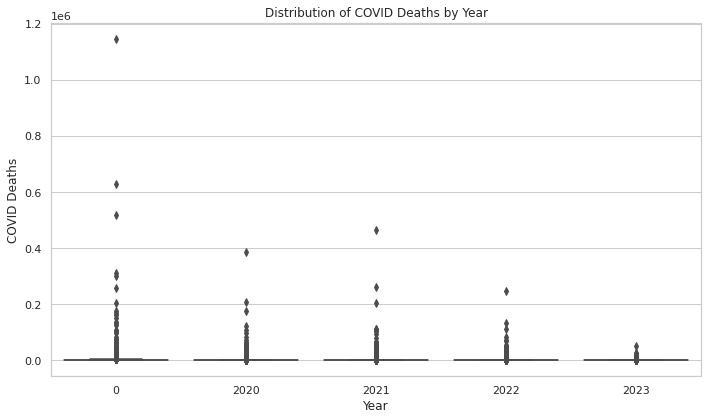

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create the boxplot
sns.boxplot(x='Year', y='COVID_Deaths', data=df)

# Customize plot
plt.title('Distribution of COVID Deaths by Year')
plt.xlabel('Year')
plt.ylabel('COVID Deaths')
plt.tight_layout()
plt.show()


SyntaxError: invalid syntax (<ipython-input-36-6832698e8bfc>, line 1)